In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Step -1: Load Dataset**

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Step -2 Check for any missing values**

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
X = dataset.iloc[:,[3,4]].values # independent variables

# Data Visualization
>  Box plot - using subplot

In [5]:
plt.style.use('fivethirtyeight')

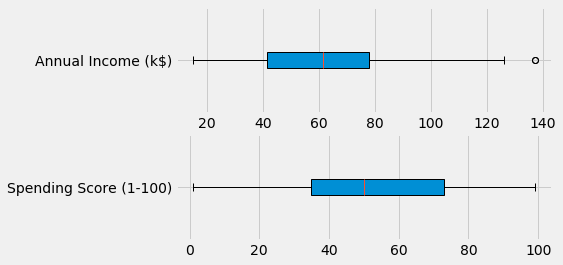

In [6]:
plt.subplot(211)
plt.boxplot(X[:,0],vert=False,patch_artist=True,labels=['Annual Income (k$)'])
plt.subplot(212)
plt.boxplot(X[:,1],vert=False,patch_artist=True,labels=['Spending Score (1-100)'])
plt.show()

> **Scatter Plot**

In [57]:
plt.style.use('seaborn')

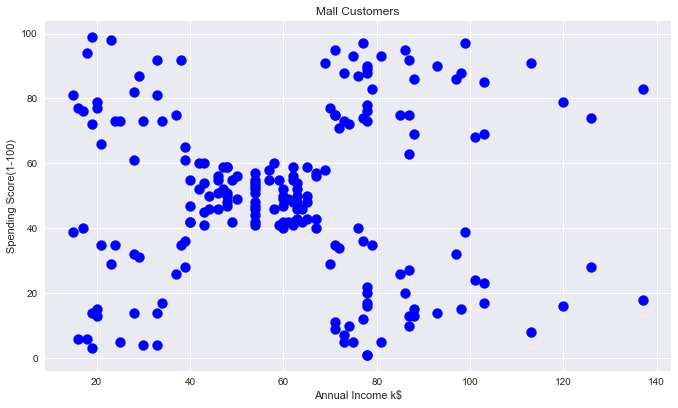

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],s =100 , color = 'b')
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score(1-100)')
plt.title('Mall Customers')
plt.show()

#  Identifying Clusters
- K Means Clustering

In [59]:
from sklearn.cluster import KMeans

** WCSS - within Cluster Sum of Squares**
for 20 clusters

In [60]:
wcss = []
for i in range(1,20):
    
    kmean = KMeans(n_clusters=i)
    kmean.fit(X) # training 
    wcss.append(kmean.inertia_) # wcss scores

> Elbow method

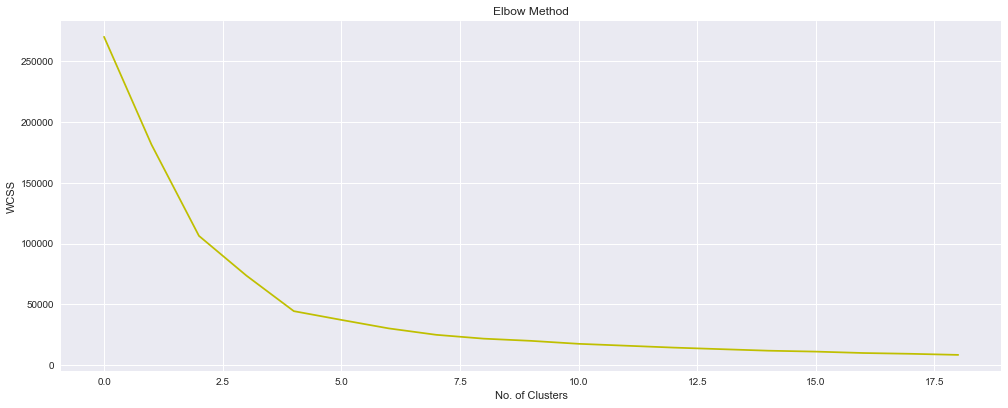

In [61]:
plt.figure(figsize=(15,6))
plt.plot(wcss,'y')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


*from elbow method We are taking 4 or 5 Cluster**

In [62]:
clusters = 5
kmean = KMeans(n_clusters=clusters)
kmean.fit(X) # training 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [63]:
y = kmean.predict(X) # it will provide class of your data
centroid = kmean.cluster_centers_

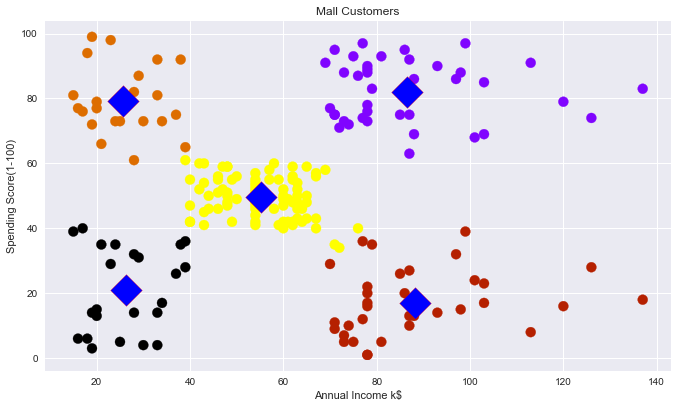

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],s =100 ,c = y,cmap = 'gnuplot')
plt.scatter(centroid[:,0], centroid[:,1], color = 'blue', s = 500,edgecolors='r',marker='D')
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score(1-100)')
plt.title('Mall Customers')
plt.show()